In [ ]:
from google.colab import files
import zipfile

# Upload the zipped dataset
uploaded = files.upload()


Saving kaggle.json to kaggle.json


In [ ]:
pip install kaggle

In [ ]:
import os
import shutil

# Create kaggle folder and move the file
os.makedirs('/root/.kaggle', exist_ok=True)
shutil.move("kaggle.json", "/root/.kaggle/kaggle.json")

# Set proper permissions
os.chmod("/root/.kaggle/kaggle.json", 0o600)

In [ ]:
# Upload your kaggle.json
from google.colab import files
files.upload()  # Upload kaggle.json here

# Make directory and move kaggle.json
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download the dataset
!kaggle datasets download -d shayanfazeli/heartbeat
!unzip heartbeat.zip -d heartbeat_dataset


Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/shayanfazeli/heartbeat
License(s): unknown
Archive:  heartbeat.zip
  inflating: heartbeat_dataset/mitbih_test.csv  
  inflating: heartbeat_dataset/mitbih_train.csv  
  inflating: heartbeat_dataset/ptbdb_abnormal.csv  
  inflating: heartbeat_dataset/ptbdb_normal.csv  


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Step 1: Load the dataset
df = pd.read_csv('/content/heartbeat_dataset/mitbih_train.csv', header=None)


In [ ]:
# Step 2: Split features and labels
X = df.iloc[:, :-1].values   # All columns except the last one
y = df.iloc[:, -1].values    # Last column (class label)



In [ ]:
#Step 3: Normalize the features (0 to 1 range)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
# Step 4: Reshape the features for CNN (samples, time_steps, channels)
X_scaled = X_scaled.reshape(X_scaled.shape[0], X_scaled.shape[1], 1)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.utils import to_categorical

# Load the datasets (assuming you have 4 datasets now)
train_df = pd.read_csv("/content/heartbeat_dataset/mitbih_test.csv", header=None)
test_df = pd.read_csv("/content/heartbeat_dataset/mitbih_train.csv", header=None)
additional_train_df = pd.read_csv("/content/heartbeat_dataset/ptbdb_abnormal.csv", header=None)
additional_test_df = pd.read_csv("/content/heartbeat_dataset/ptbdb_normal.csv", header=None)

# Combine all 4 datasets into one
full_df = pd.concat([train_df, test_df, additional_train_df, additional_test_df], ignore_index=True)

# Split features and labels
X = full_df.iloc[:, :-1].values  # All columns except the last
y = full_df.iloc[:, -1].values   # Last column is the label

# Normalize the features (scale them to [0, 1])
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Reshape for CNN (samples, time_steps, channels)
X_scaled = X_scaled.reshape(X_scaled.shape[0], X_scaled.shape[1], 1)

# One-hot encode the labels (assuming 5 classes)
y_encoded = to_categorical(y, num_classes=5)

# Final shapes after processing
print("X shape:", X_scaled.shape)
print("y shape:", y_encoded.shape)


X shape: (123998, 187, 1)
y shape: (123998, 5)


In [ ]:
from sklearn.model_selection import train_test_split

# Optionally split into training and test sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)


In [ ]:
# Print the shapes of the processed data
print("X shape:", X_scaled.shape)
print("y shape:", y_encoded.shape)


X shape: (123998, 187, 1)
y shape: (123998, 5)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

# Build the 1D CNN model
model = Sequential([
    # First Convolutional layer
    Conv1D(64, kernel_size=5, activation='relu', input_shape=(X_scaled.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Dropout(0.2),

    # Second Convolutional layer
    Conv1D(128, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Dropout(0.2),

    # Flatten the output
    Flatten(),

    # Fully connected layer
    Dense(64, activation='relu'),

    # Output layer with 5 classes (for ECG heartbeats)
    Dense(5, activation='softmax')  # 5 classes
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# Show a summary of the model
model.summary()



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_2 (Conv1D)               │ (None, 183, 64)        │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 91, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 91, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 89, 128)        │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_3 (MaxPooling1D)  │ (None, 44, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 44, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 5632)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │       360,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 385,925 (1.47 MB)

 Trainable params: 385,925 (1.47 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
1240/1240 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.8222 - loss: 0.5517 - val_accuracy: 0.9027 - val_loss: 0.2766
Epoch 2/10
1240/1240 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9083 - loss: 0.2633 - val_accuracy: 0.9332 - val_loss: 0.1944
Epoch 3/10
1240/1240 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9296 - loss: 0.2036 - val_accuracy: 0.9423 - val_loss: 0.1687
Epoch 4/10
1240/1240 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9437 - loss: 0.1655 - val_accuracy: 0.9460 - val_loss: 0.1557
Epoch 5/10
1240/1240 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9518 - loss: 0.1458 - val_accuracy: 0.9584 - val_loss: 0.1292
Epoch 6/10
1240/1240 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9563 - loss: 0.1314 - val_accuracy: 0.9603 - val_loss: 0.1250
Epoch 7/10
1240/1240 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9609 - loss: 0.1158 - val_accuracy: 0.9640 - val_loss: 0.1148
Epoch 8/10
1240/1240 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9642 - loss: 0.1084 -

In [ ]:
model.save("trained_model.h5")
print("Model saved as 'trained_model.h5'")

Model saved as 'trained_model.h5'


In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy}")

Test Accuracy: 0.9693951606750488


In [ ]:
trainloss, train_accuracy = model.evaluate(X_train, y_train, verbose=0)
print(f"Train Accuracy: {train_accuracy}")

Train Accuracy: 0.978366494178772


775/775 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


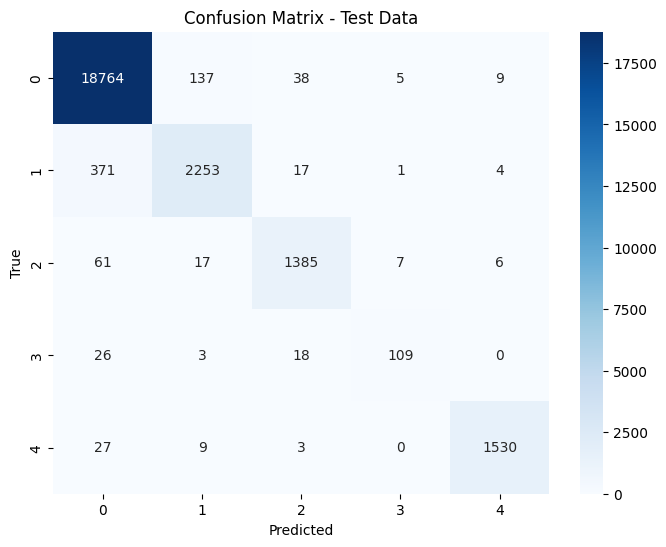

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
# Make predictions on the test data
y_test_pred = np.argmax(model.predict(X_test), axis=1)
y_test_labels = np.argmax(y_test, axis=1)

# Confusion Matrix
cm = confusion_matrix(y_test_labels, y_test_pred)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.arange(5), yticklabels=np.arange(5))
plt.title('Confusion Matrix - Test Data')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

3100/3100 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step


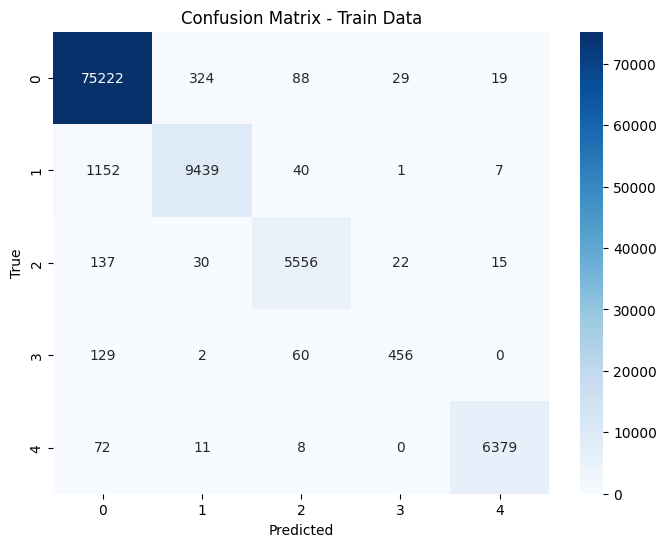

In [ ]:
# Make predictions on the test data
y_train_pred = np.argmax(model.predict(X_train), axis=1)
y_train_labels = np.argmax(y_train, axis=1)

# Confusion Matrix
cm = confusion_matrix(y_train_labels, y_train_pred)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.arange(5), yticklabels=np.arange(5))
plt.title('Confusion Matrix - Train Data')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Class Imbalance problem and it is biased to class 0

In [ ]:
model.save("trained_modelCB.h5")
print("Model saved as 'trained_model.h5'")

Model saved as 'trained_model.h5'


In [ ]:
from sklearn.utils import class_weight

# Convert y_train back to original labels (if one-hot encoded)
y_train_labels = np.argmax(y_train, axis=1)

# Compute class weights
weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train_labels),
    y=y_train_labels
)

# Convert to dict format for Keras
class_weights = dict(enumerate(weights))

# Retrain model with class weights
model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=64,
    validation_split=0.2,
    class_weight=class_weights,
    #callbacks=[early_stopping]
)


Epoch 1/30
1240/1240 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8997 - loss: 0.2367 - val_accuracy: 0.9123 - val_loss: 0.2460
Epoch 2/30
1240/1240 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9133 - loss: 0.1757 - val_accuracy: 0.9505 - val_loss: 0.1433
Epoch 3/30
1240/1240 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9181 - loss: 0.1618 - val_accuracy: 0.8956 - val_loss: 0.2695
Epoch 4/30
1240/1240 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9247 - loss: 0.1303 - val_accuracy: 0.9190 - val_loss: 0.2152
Epoch 5/30
1240/1240 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9354 - loss: 0.1106 - val_accuracy: 0.9287 - val_loss: 0.2018
Epoch 6/30
1240/1240 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9299 - loss: 0.1241 - val_accuracy: 0.9442 - val_loss: 0.1644
Epoch 7/30
1240/1240 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9407 - loss: 0.1036 - val_accuracy: 0.9033 - val_loss: 0.2873
Epoch 8/30
1240/1240 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9342 - loss: 0.1065 - 

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy}")

Test Accuracy: 0.9492741823196411


In [ ]:
trainloss, train_accuracy = model.evaluate(X_train, y_train, verbose=0)
print(f"Train Accuracy: {train_accuracy}")

Train Accuracy: 0.9637392163276672


775/775 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


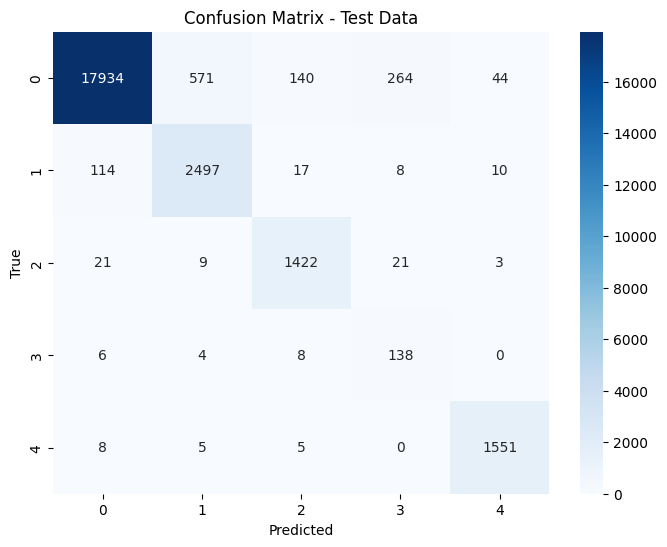

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
# Make predictions on the test data
y_test_pred = np.argmax(model.predict(X_test), axis=1)
y_test_labels = np.argmax(y_test, axis=1)

# Confusion Matrix
cm = confusion_matrix(y_test_labels, y_test_pred)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.arange(5), yticklabels=np.arange(5))
plt.title('Confusion Matrix - Test Data')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

3100/3100 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step


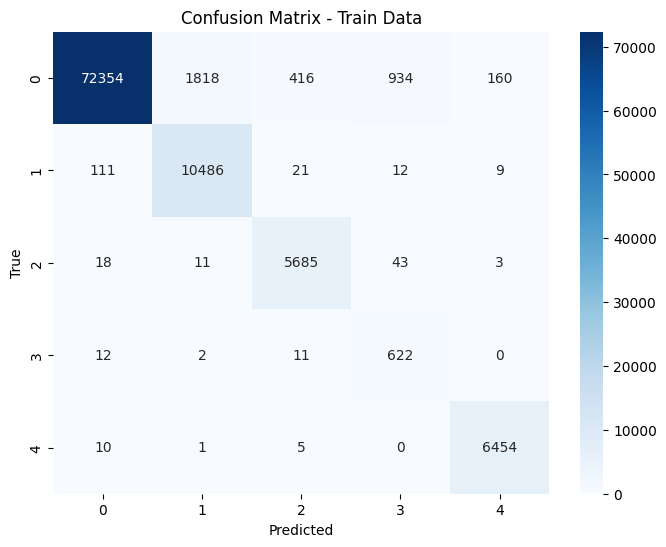

In [ ]:
# Make predictions on the test data
y_train_pred = np.argmax(model.predict(X_train), axis=1)
y_train_labels = np.argmax(y_train, axis=1)

# Confusion Matrix
cm = confusion_matrix(y_train_labels, y_train_pred)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.arange(5), yticklabels=np.arange(5))
plt.title('Confusion Matrix - Train Data')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

exit